In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
        # print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


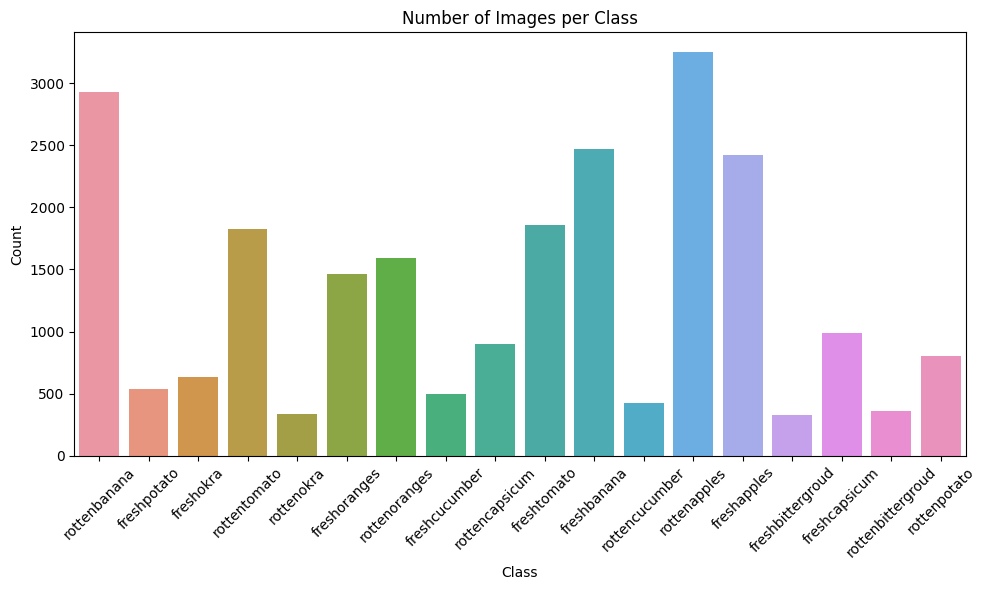

In [3]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import random

# === Config ===
TRAIN_DIR = Path("/kaggle/input/fresh-and-stale-classification/dataset/Train")

# === 1. Count images per class ===
class_counts = {}
image_shapes = []

for class_dir in TRAIN_DIR.iterdir():
    if class_dir.is_dir():
        images = list(class_dir.glob("*.*"))
        class_counts[class_dir.name] = len(images)

        # Sample a few image shapes
        for img_path in random.sample(images, min(10, len(images))):
            try:
                img = Image.open(img_path)
                image_shapes.append(img.size)  # (width, height)
            except Exception as e:
                print(f"Failed to open {img_path}: {e}")

# === 2. Plot class distribution ===
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Number of Images per Class")
plt.ylabel("Count")
plt.xlabel("Class")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


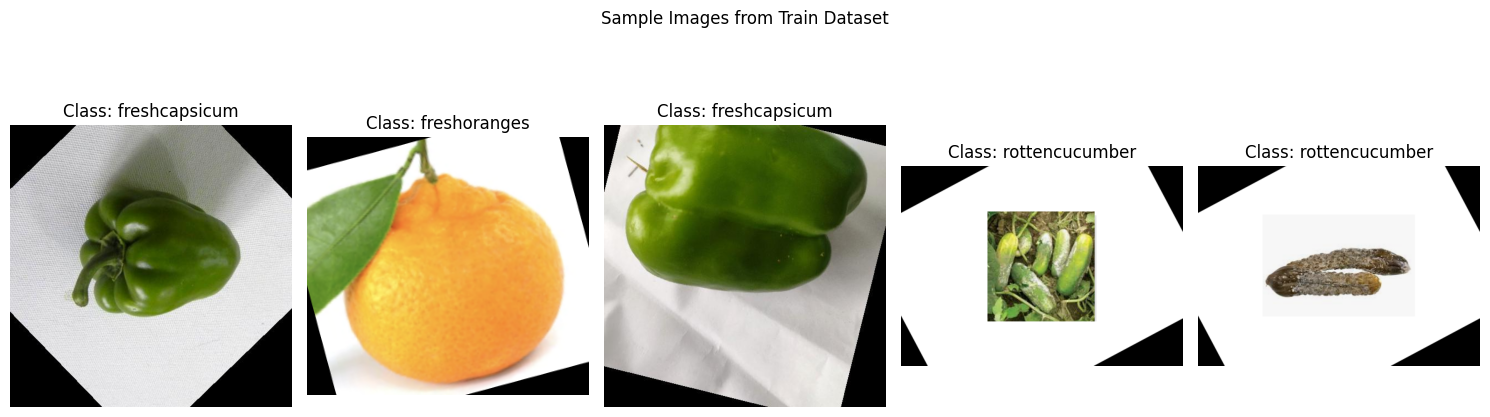

Number of sampled images: 180
Avg Width x Height: 465.0 x 394.3
Min Size: 188x170
Max Size: 730x512


In [8]:

# === 3. Display sample images ===
num_samples = 5
plt.figure(figsize=(15, 5))

all_class_dirs = list(TRAIN_DIR.iterdir())
for i in range(num_samples):
    class_dir = random.choice(all_class_dirs)
    img_path = random.choice(list(class_dir.glob("*.*")))
    img = Image.open(img_path)

    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img)
    plt.title(f"Class: {class_dir.name}")
    plt.axis("off")

plt.suptitle("Sample Images from Train Dataset")
plt.tight_layout()
plt.show()

# === 4. Image shape statistics ===
if image_shapes:
    widths, heights = zip(*image_shapes)
    print(f"Number of sampled images: {len(image_shapes)}")
    print(f"Avg Width x Height: {np.mean(widths):.1f} x {np.mean(heights):.1f}")
    print(f"Min Size: {min(widths)}x{min(heights)}")
    print(f"Max Size: {max(widths)}x{max(heights)}")
else:
    print("No image sizes could be extracted.")


### Class Count Sorted + Rotated

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


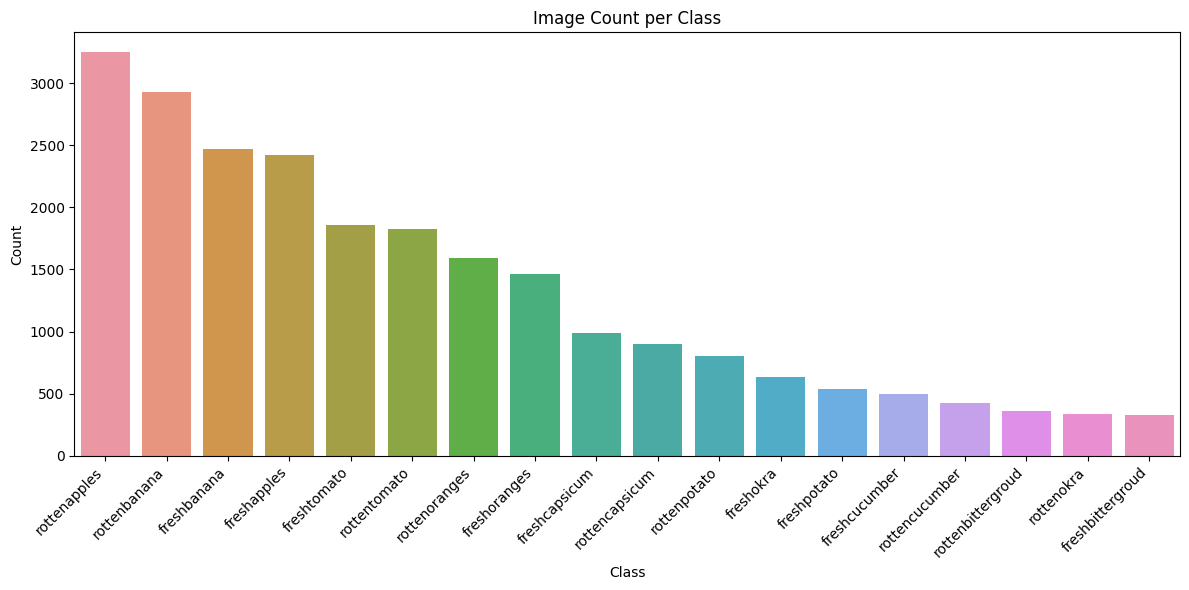

In [10]:
# Sort by count
sorted_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(12, 6))
sns.barplot(x=list(sorted_counts.keys()), y=list(sorted_counts.values()))
plt.title("Image Count per Class")
plt.ylabel("Count")
plt.xlabel("Class")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### RGB Means — One Chart per Channel

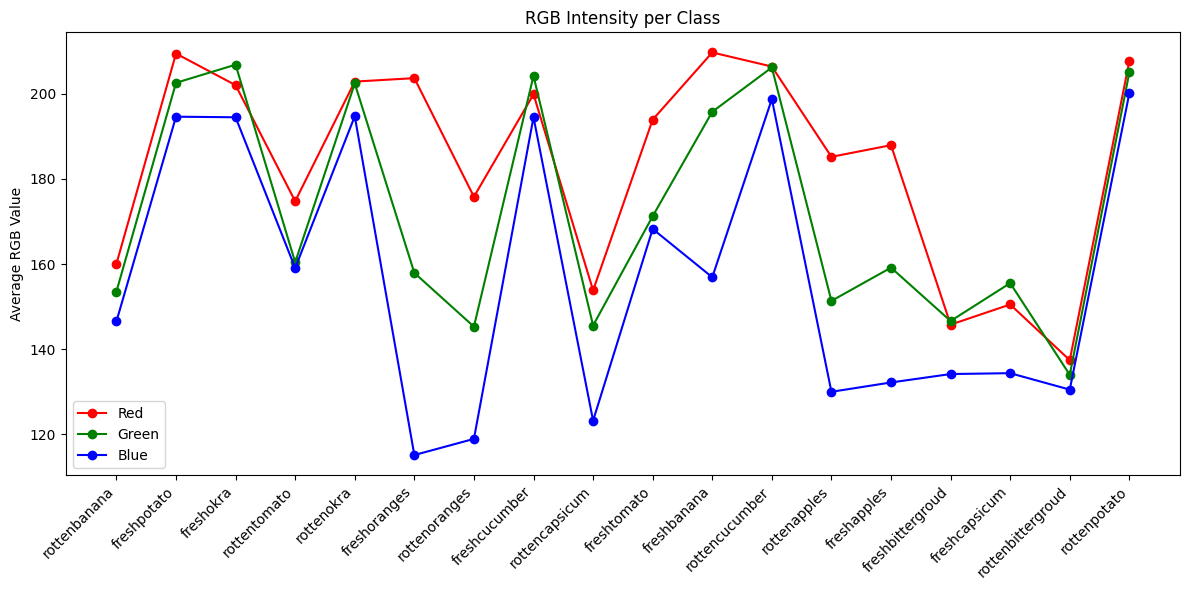

In [11]:
rgb_means = {cls: np.mean(vals, axis=0) for cls, vals in class_rgb_means.items()}
classes = list(rgb_means.keys())
r_vals = [rgb_means[c][0] for c in classes]
g_vals = [rgb_means[c][1] for c in classes]
b_vals = [rgb_means[c][2] for c in classes]

plt.figure(figsize=(12, 6))
plt.plot(classes, r_vals, marker='o', label='Red', color='red')
plt.plot(classes, g_vals, marker='o', label='Green', color='green')
plt.plot(classes, b_vals, marker='o', label='Blue', color='blue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average RGB Value")
plt.title("RGB Intensity per Class")
plt.legend()
plt.tight_layout()
plt.show()


### Brightness — Box Plot Instead of KDE

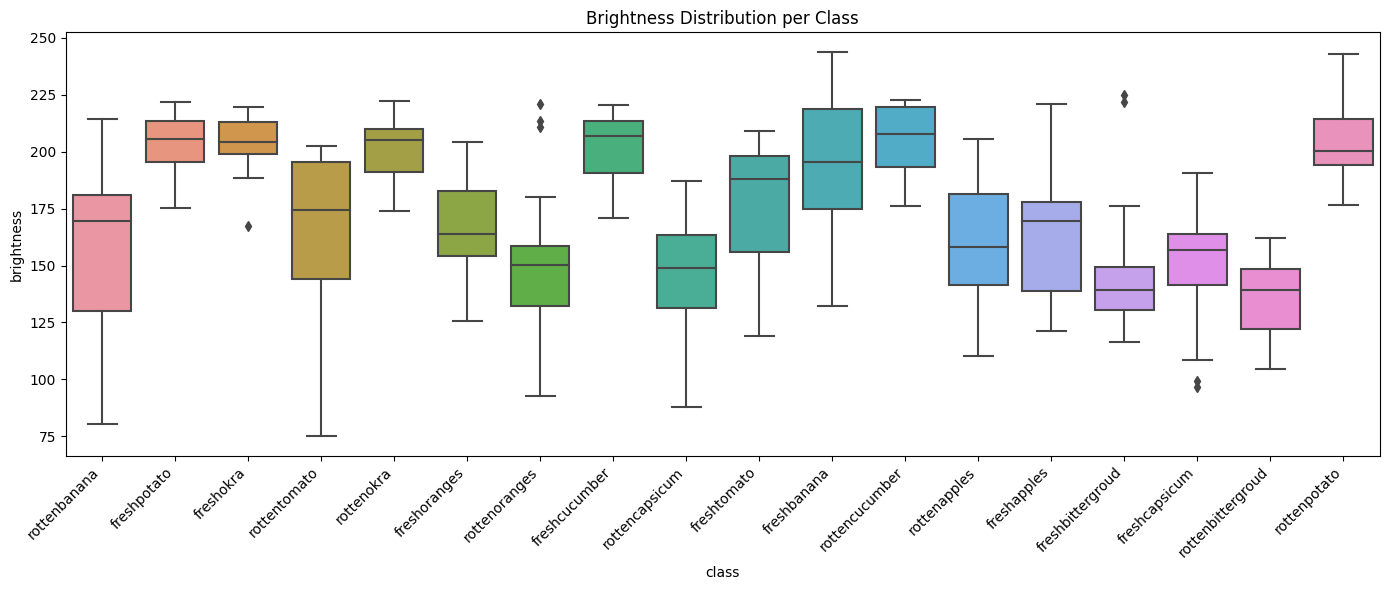

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert list of dicts → DataFrame
brightness_df = pd.DataFrame(brightness_data)

# Now plot with seaborn
plt.figure(figsize=(14, 6))
sns.boxplot(data=brightness_df, x="class", y="brightness")
plt.title("Brightness Distribution per Class")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [15]:
# Categorization dictionary
fresh_rotten_map = {
    'rottenbanana': 'rotten',
    'freshpotato': 'fresh',
    'freshokra': 'fresh',
    'rottentomato': 'rotten',
    'rottenokra': 'rotten',
    'freshoranges': 'fresh',
    'rottenoranges': 'rotten',
    'freshcucumber': 'fresh',
    'rottencapsicum': 'rotten',
    'freshtomato': 'fresh',
    'freshbanana': 'fresh',
    'rottencucumber': 'rotten',
    'rottenapples': 'rotten',
    'freshapples': 'fresh',
    'freshbittergroud': 'fresh',
    'freshcapsicum': 'fresh',
    'rottenbittergroud': 'rotten',
    'rottenpotato': 'rotten',
}


In [16]:
import os
import cv2
import numpy as np
from pathlib import Path
from tqdm import tqdm

DATASET_DIR = Path("/kaggle/input/fresh-and-stale-classification/dataset/Train")
brightness_data = []

for class_dir in tqdm(DATASET_DIR.iterdir(), desc="Processing Classes"):
    label = class_dir.name
    freshness = fresh_rotten_map.get(label, "unknown")

    for img_path in class_dir.glob("*.jpg"):
        img = cv2.imread(str(img_path))
        if img is None:
            continue
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        brightness = np.mean(img_gray)

        brightness_data.append({
            "class": label,
            "freshness": freshness,
            "brightness": brightness
        })

import pandas as pd

df = pd.DataFrame(brightness_data)


Processing Classes: 18it [00:45,  2.51s/it]


###  Class Distribution

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
sns.countplot(data=df, x="class", order=df["class"].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title("Class Distribution (Fresh vs Rotten)")
plt.tight_layout()
plt.show()


### Fresh vs Rotten Distribution

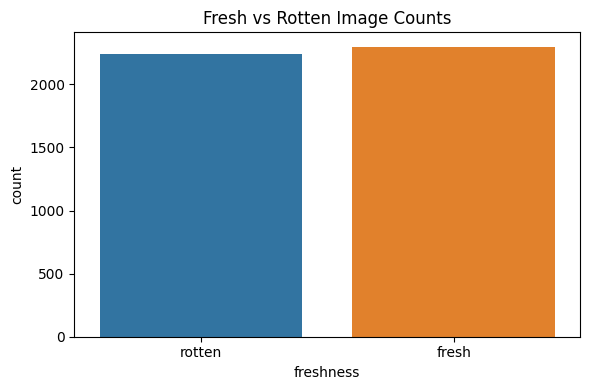

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="freshness")
plt.title("Fresh vs Rotten Image Counts")
plt.tight_layout()
plt.show()


### Brightness Distribution by Freshness

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="freshness", y="brightness")
plt.title("Brightness Distribution: Fresh vs Rotten")
plt.tight_layout()
plt.show()


### Brightness Distribution per Class

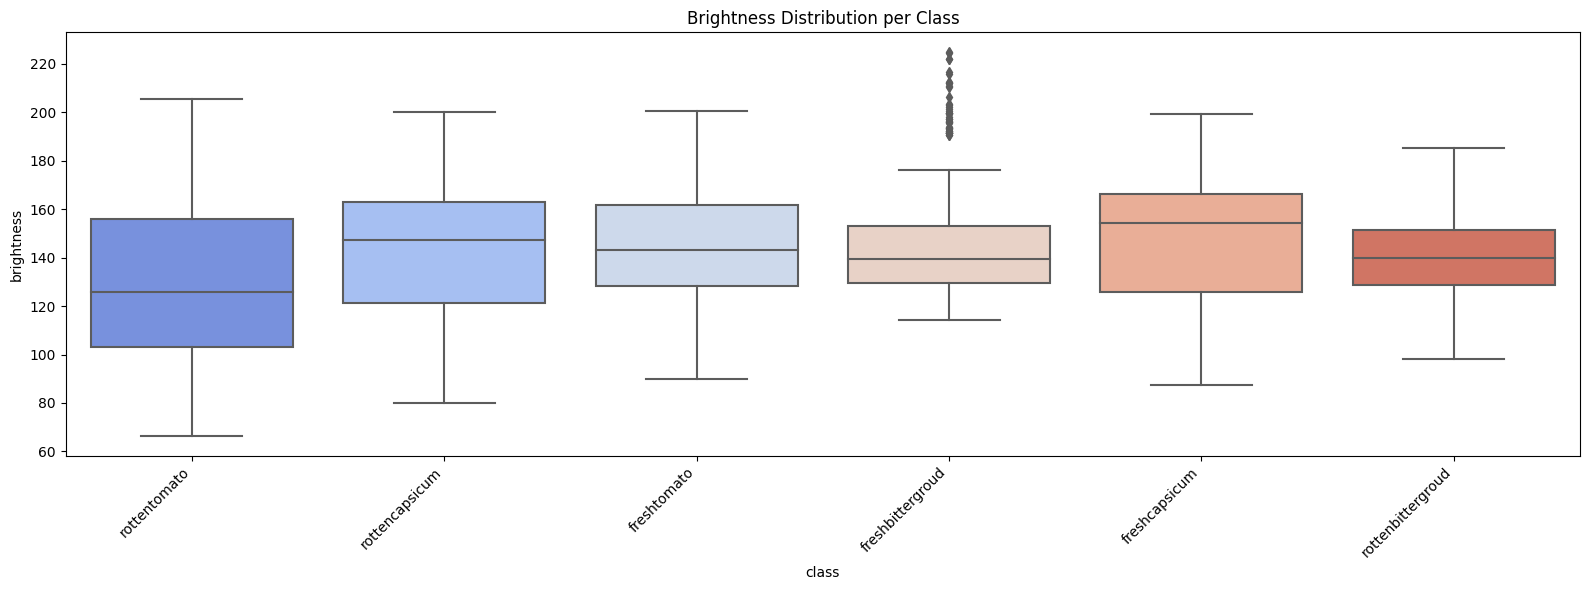

In [20]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x="class", y="brightness", palette="coolwarm")
plt.title("Brightness Distribution per Class")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Histogram Overlays

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

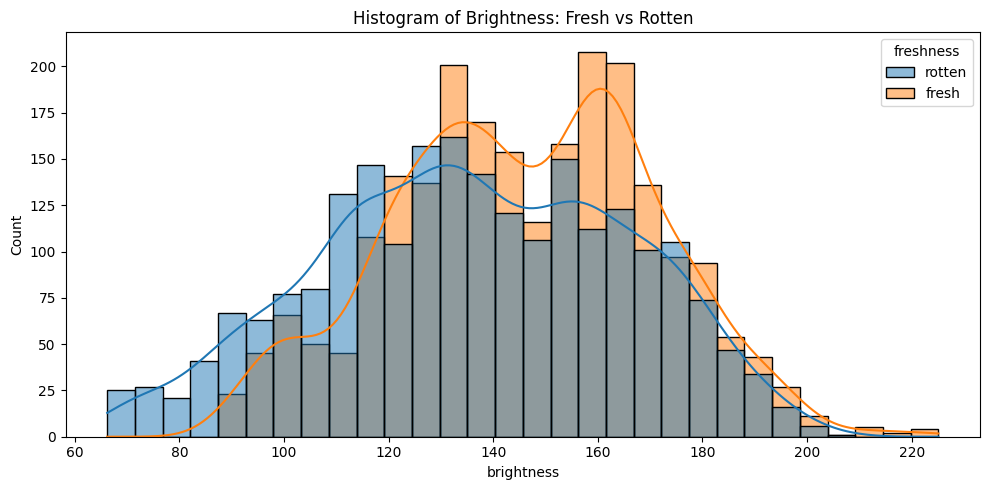

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="brightness", hue="freshness", kde=True, bins=30)
plt.title("Histogram of Brightness: Fresh vs Rotten")
plt.tight_layout()
plt.show()
